In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

import requests
import json
import io
import os
from tabulate import tabulate
import pprint
from plydata import define, query, select, head, do, group_by, summarize, arrange, left_join, distinct 

import re
from bs4 import BeautifulSoup

In [4]:
def print_table(table):
    print(tabulate(table, headers='keys', showindex=False, tablefmt='presto'))

In [10]:
with open('samples.json') as f:
    json_data = json.loads(f.read())

In [16]:
json_data[0:3]

[{'sku': 'HB-001',
  'manufacturer_name': 'House Brand',
  'product_name': 'SoftShield Latex Exam Gloves',
  'size': 'Small',
  'color': 'Blue',
  'quantity': '100/Bx',
  'name': 'House Brand SoftShield Latex Exam Gloves - Small - Blue - 100/Bx'},
 {'sku': 'HB-002',
  'manufacturer_name': 'House Brand',
  'product_name': 'SoftShield Latex Exam Gloves',
  'size': 'Medium',
  'color': 'Red',
  'quantity': '200/Bx',
  'name': 'House Brand SoftShield Latex Exam Gloves - Medium - Red - 200/Bx'},
 {'sku': 'HB-003',
  'manufacturer_name': 'House Brand',
  'product_name': 'SoftShield Latex Exam Gloves',
  'size': 'Large',
  'color': 'Green',
  'quantity': '300/Bx',
  'name': 'House Brand SoftShield Latex Exam Gloves - Large - Green - 300/Bx'}]

In [38]:
raw_product_data = pd.DataFrame(json_data)

In [39]:
raw_product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sku                45 non-null     object
 1   manufacturer_name  45 non-null     object
 2   product_name       45 non-null     object
 3   size               45 non-null     object
 4   color              45 non-null     object
 5   quantity           45 non-null     object
 6   name               45 non-null     object
dtypes: object(7)
memory usage: 2.6+ KB


In [40]:
print_table(raw_product_data.head())

 sku    | manufacturer_name   | product_name                  | size   | color   | quantity   | name
--------+---------------------+-------------------------------+--------+---------+------------+-------------------------------------------------------------------
 HB-001 | House Brand         | SoftShield Latex Exam Gloves  | Small  | Blue    | 100/Bx     | House Brand SoftShield Latex Exam Gloves - Small - Blue - 100/Bx
 HB-002 | House Brand         | SoftShield Latex Exam Gloves  | Medium | Red     | 200/Bx     | House Brand SoftShield Latex Exam Gloves - Medium - Red - 200/Bx
 HB-003 | House Brand         | SoftShield Latex Exam Gloves  | Large  | Green   | 300/Bx     | House Brand SoftShield Latex Exam Gloves - Large - Green - 300/Bx
 OT-001 | OmniTrust           | SensiCare Nitrile Exam Gloves | Small  | Blue    | 100/Bx     | OmniTrust SensiCare Nitrile Exam Gloves - Small - Blue - 100/Bx
 OT-002 | OmniTrust           | SensiCare Nitrile Exam Gloves | Medium | Red     | 200/Bx   

In [41]:
print_table(raw_product_data
            >> group_by('manufacturer_name') 
            >> summarize(cnt='n()')
           )

 manufacturer_name   |   cnt
---------------------+-------
 House Brand         |     9
 OmniTrust           |     9
 TruFit              |     9
 Alasta              |     9
 Blossom             |     9


In [42]:
print_table(raw_product_data 
            >> group_by('size') 
            >> summarize(cnt='n()')
           )

 size   |   cnt
--------+-------
 Small  |    15
 Medium |    15
 Large  |    15


In [43]:
print_table(raw_product_data 
            >> group_by('quantity') 
            >> summarize(cnt='n()')
           )

 quantity   |   cnt
------------+-------
 100/Bx     |     5
 200/Bx     |    11
 300/Bx     |     6
 150/Bx     |     5
 250/Bx     |     6
 350/Bx     |     1
 120/Bx     |     1
 220/Bx     |     3
 180/Bx     |     7


In [44]:
print_table(raw_product_data 
            >> group_by('product_name') 
            >> summarize(cnt='n()')
            >> arrange('product_name')
           )

 product_name                     |   cnt
----------------------------------+-------
 ComfortGrip Nitrile Exam Gloves  |     1
 DuraFit Vinyl Exam Gloves        |     3
 DuraGrip Latex Exam Gloves       |     1
 DuraShield Vinyl Exam Gloves     |     1
 FitGuard Vinyl Exam Gloves       |     1
 FlexGuard Nitrile Exam Gloves    |     1
 FlexShield Latex Exam Gloves     |     1
 FlexTouch Nitrile Gloves         |     1
 FlexiFit Nitrile Exam Gloves     |     1
 FlexiShield Vinyl Exam Gloves    |     1
 GloveGuard Polyethylene Gloves   |     1
 GripComfort Nitrile Exam Gloves  |     1
 GripSafe Nitrile Exam Gloves     |     1
 LavenderGuard Latex Exam Gloves  |     1
 MagnoliaTouch Nitrile Gloves     |     1
 NitrileGuard Nitrile Exam Gloves |     1
 OrchidGuard Nitrile Gloves       |     1
 PolyComfort Polyethylene Gloves  |     1
 PolyCuff Polyethylene Gloves     |     3
 PolyGrip Polyethylene Gloves     |     1
 PolyTouch Polyethylene Gloves    |     1
 RoseGuard Nitrile Gloves        

In [36]:
## Create a lookup table for manufacturer

manufacturer_names = [
    {'manufacturer_name': 'House Brand', 'id': 1},
    {'manufacturer_name': 'OmniTrust', 'id': 2},
    {'manufacturer_name': 'TruFit', 'id': 3},
    {'manufacturer_name': 'Alasta', 'id': 4},
    {'manufacturer_name': 'Blossom', 'id': 5}
]

dim_manufacturers = pd.DataFrame(manufacturer_names)

In [37]:
print_table(dim_manufacturers)

 manufacturer_name   |   id
---------------------+------
 House Brand         |    1
 OmniTrust           |    2
 TruFit              |    3
 Alasta              |    4
 Blossom             |    5


In [ ]:
df['pid'] = df['id'] * 10000000 + data.groupby(by='manufacturer_name')['name'].rank(method='first').astype('int')
df['pid'].unique().shape

In [46]:
data = pd.merge(raw_product_data, 
                dim_manufacturers, 
                how='left', 
                left_on=['manufacturer_name'], 
                right_on=['manufacturer_name']
               )

In [55]:
data.rename(columns = {'id' : 'manufacturer_id'}, inplace=True)

In [56]:
data.head()

,sku,manufacturer_name,product_name,size,color,quantity,name,manufacturer_id
0,HB-001,House Brand,SoftShield Latex Exam Gloves,Small,Blue,100/Bx,House Brand SoftShield Latex Exam Gloves - Sma...,1
1,HB-002,House Brand,SoftShield Latex Exam Gloves,Medium,Red,200/Bx,House Brand SoftShield Latex Exam Gloves - Med...,1
2,HB-003,House Brand,SoftShield Latex Exam Gloves,Large,Green,300/Bx,House Brand SoftShield Latex Exam Gloves - Lar...,1
3,OT-001,OmniTrust,SensiCare Nitrile Exam Gloves,Small,Blue,100/Bx,OmniTrust SensiCare Nitrile Exam Gloves - Smal...,2
4,OT-002,OmniTrust,SensiCare Nitrile Exam Gloves,Medium,Red,200/Bx,OmniTrust SensiCare Nitrile Exam Gloves - Medi...,2


In [58]:
data['pid'] = data['manufacturer_id'] * 10000000 + data.groupby(by='manufacturer_name')['name'].rank(method='first').astype('int')
data['pid'].unique().shape

(45,)

In [59]:
print_table(data 
            >> group_by('manufacturer_name') 
            >> summarize(cnt='n()', names='n_unique(name)', pids='n_unique(pid)')
            >> arrange('-pids')
           )

 manufacturer_name   |   cnt |   names |   pids
---------------------+-------+---------+--------
 House Brand         |     9 |       9 |      9
 OmniTrust           |     9 |       9 |      9
 TruFit              |     9 |       9 |      9
 Alasta              |     9 |       9 |      9
 Blossom             |     9 |       9 |      9


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def similarity(name1, name2):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([name1, name2])
    # Calculate the cosine similarity between the vectors
    similarity = cosine_similarity(vectors)
    return similarity[0][1]

In [66]:
from pandarallel import pandarallel

# pandarallel.initialize(progress_bar=True)
pandarallel.initialize()

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [62]:
df = data.merge(data, how='outer', left_on=['manufacturer_name'], right_on=['manufacturer_name'], suffixes=('', '_y'))

In [67]:
df['relevance_score'] = df.parallel_apply(lambda df : similarity(df['name'], df['name_y']), axis=1)

In [69]:
df['relevance_score'].describe()

count    405.000000
mean       0.466497
std        0.208963
min        0.216934
25%        0.336097
50%        0.387557
75%        0.503103
max        1.000000
Name: relevance_score, dtype: float64

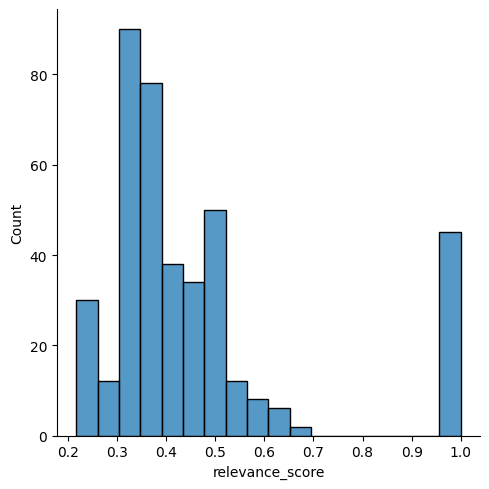

In [76]:
sns.displot(df['relevance_score'])
plt.show()

In [83]:
print_table(df 
            >> query("pid==10000006")
            >> select('pid', 'pid_y', 'name', 'name_y', 'relevance_score')
            >> arrange('-relevance_score', 'pid', 'pid_y')
            >> head(10)
           )

      pid |    pid_y | name                                                             | name_y                                                                |   relevance_score
----------+----------+------------------------------------------------------------------+-----------------------------------------------------------------------+-------------------
 10000006 | 10000006 | House Brand SoftShield Latex Exam Gloves - Medium - Red - 200/Bx | House Brand SoftShield Latex Exam Gloves - Medium - Red - 200/Bx      |          1
 10000006 | 10000009 | House Brand SoftShield Latex Exam Gloves - Medium - Red - 200/Bx | House Brand SureShield Latex Exam Gloves - Medium - Green - 200/Bx    |          0.669419
 10000006 | 10000005 | House Brand SoftShield Latex Exam Gloves - Medium - Red - 200/Bx | House Brand SoftShield Latex Exam Gloves - Large - Green - 300/Bx     |          0.541544
 10000006 | 10000007 | House Brand SoftShield Latex Exam Gloves - Medium - Red - 200/Bx | House Brand Soft